In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import scipy.stats as st

In [2]:
# Read file into a Pandas DataFrame
csv_path = "../BLS_API_output/BLS_Multiextract_1.csv"
multiextract = pd.read_csv(csv_path)
multiextract.replace(r'^\s*$', np.nan, regex=True)
multiextract.head()

,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
0,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2023,M02,February,153955.0
1,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2023,M01,January,152836.0
2,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2022,M13,Annual,152575.0
3,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2022,M12,December,155344.0
4,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2022,M11,November,155642.0


In [3]:
# National Employment (Employees in Thousands)
nat_employment = multiextract[multiextract["seriesId"] == "CEU0000000001"] 
nat_employment = nat_employment.drop(nat_employment[nat_employment["periodName"] == "Annual"].index)
nat_employment.head()

,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
0,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2023,M02,February,153955.0
1,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2023,M01,January,152836.0
3,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2022,M12,December,155344.0
4,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2022,M11,November,155642.0
5,CEU0000000001,Not Seasonally Adjusted,"Employment, Hours, and Earnings from the Curre...","ALL EMPLOYEES, THOUSANDS",Total nonfarm,Total nonfarm,NaN,2022,M10,October,155041.0


In [4]:
# Layoffs and discharges rate in total nonfarm jobs (Rate)
layoffs_rate = multiextract[multiextract["seriesId"] == "JTU000000000000000LDR"] 
layoffs_rate = layoffs_rate.drop(layoffs_rate[layoffs_rate["periodName"] == "Annual"].index)
layoffs_rate.head()

,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
221,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2023,M01,January,1.5
223,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2022,M12,December,1.1
224,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2022,M11,November,0.9
225,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2022,M10,October,1.0
226,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2022,M09,September,1.0


In [5]:
layoffs_adapted = layoffs_rate[layoffs_rate["value"] < 6]
layoffs_adapted.head()

,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
221,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2023,M01,January,1.5
223,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2022,M12,December,1.1
224,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2022,M11,November,0.9
225,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2022,M10,October,1.0
226,JTU000000000000000LDR,NaN,NaN,NaN,NaN,NaN,NaN,2022,M09,September,1.0


In [6]:
# Gross Job Losses (Rate)
gross_joblosses = multiextract[multiextract["seriesId"] == "BDS0000000000000000110104RQ5"] 
gross_joblosses.head()

,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
171,BDS0000000000000000110104RQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Losses,Total private,Private Sector,U.S. totals,2022,Q02,2nd Quarter,16.8
172,BDS0000000000000000110104RQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Losses,Total private,Private Sector,U.S. totals,2022,Q01,1st Quarter,15.2
173,BDS0000000000000000110104RQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Losses,Total private,Private Sector,U.S. totals,2021,Q04,4th Quarter,14.5
174,BDS0000000000000000110104RQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Losses,Total private,Private Sector,U.S. totals,2021,Q03,3rd Quarter,15.9
175,BDS0000000000000000110104RQ5,Seasonally Adjusted,Business Employment Dynamics,Gross Job Losses,Total private,Private Sector,U.S. totals,2021,Q02,2nd Quarter,14.7


In [7]:
# Consumer Price Index for all items
cpi = multiextract[multiextract["seriesId"] == "CUUR0000SA0"] 
cpi = cpi.drop(cpi[cpi["periodName"] == "Annual"].index)
cpi.head()

,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
391,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2023,M02,February,300.840
392,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2023,M01,January,299.170
394,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M12,December,296.797
395,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M11,November,297.711
396,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M10,October,298.012


In [8]:
# Consumer Price Index for all items without Feb 2023
cpi_2 = cpi.drop(cpi[cpi["value"] == 300.840].index)
cpi_2.head()

,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
392,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2023,M01,January,299.170
394,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M12,December,296.797
395,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M11,November,297.711
396,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M10,October,298.012
397,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M09,September,296.808


In [9]:
# Consumer Price Index for all items without Feb and Jan2023
cpi_3 = cpi_2.drop(cpi[cpi["value"] == 299.170].index)
cpi_3.head()

,seriesId,seasonality,survey_name,measure_data_type,commerce_industry,commerce_sector,area,year,period,periodName,value
394,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M12,December,296.797
395,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M11,November,297.711
396,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M10,October,298.012
397,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M09,September,296.808
398,CUUR0000SA0,Not Seasonally Adjusted,CPI for All Urban Consumers (CPI-U),All items,NaN,NaN,U.S. city average,2022,M08,August,296.171


In [10]:
# # Merge CPI and National Employment 

# # Modify CPI
# cpi_modified = cpi[["year", "period", "periodName", "value"]]
# cpi_modified.rename(columns={'value': 'CPI'}, inplace=True)

# # Modify National Employment (Employees in Thousands)
# nat_employment_modified = nat_employment[["year", "period", "periodName", "value"]]
# nat_employment_modified.rename(columns={'value': 'National Employment'}, inplace=True)

# cpi_employment = pd.merge(cpi_modified, nat_employment_modified, how = "outer", on = ["year", "period", "periodName"])
# cpi_employment.head()

# # Plot cpi_employment
# cpi_ce = cpi_employment["CPI"]
# emp_ce = cpi_employment["National Employment"]
# plt.scatter(cpi_ce, emp_ce)
# plt.xlabel("Consumer Price Index (Inflation)")
# plt.ylabel("National Employment (Employees in Thousands)")
# plt.title("CPI vs National Employment")

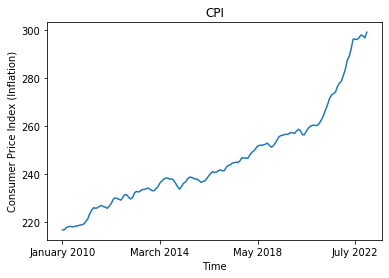

In [11]:
#Make CPI DF with one date column 
cpi_2["Date"] = cpi_2["periodName"].astype(str) + " " + cpi_2["year"].astype(str)
cpi_2_reversed = cpi_2.iloc[::-1]
cpi_2_reversed.head()

#Plot CPI
cpi_2_date = cpi_2_reversed["Date"]
cpi_2_value = cpi_2_reversed["value"]

tick_spacing = 50

fig, ax = plt.subplots(1,1)
ax.plot(cpi_2_date,cpi_2_value)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Time")
plt.ylabel("Consumer Price Index (Inflation)")
plt.title("CPI")

plt.savefig("../Graphs/CPI.png")

plt.show()

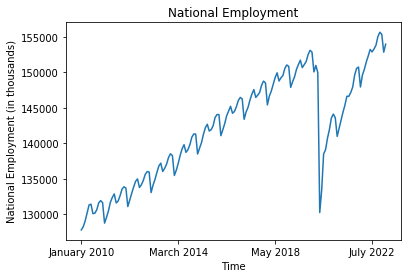

In [12]:
#Make National Employment DF with one date column 
nat_employment["Date"] = nat_employment["periodName"].astype(str) + " " + nat_employment["year"].astype(str)
nat_employment_reversed = nat_employment.iloc[::-1]
nat_employment_reversed.head()

#Plot National Employment
nat_employment_date = nat_employment_reversed["Date"]
nat_employment_value = nat_employment_reversed["value"]

tick_spacing = 50

fig, ax = plt.subplots(1,1)
ax.plot(nat_employment_date,nat_employment_value)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Time")
plt.ylabel("National Employment (in thousands)")
plt.title("National Employment")
plt.savefig("../Graphs/National_Employment.png")

plt.show()

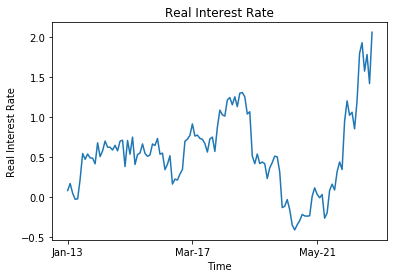

In [13]:
# Read file into a Pandas DataFrame
csv_path = "../Interest_Rate_Data/REAINTRATREARAT10Y_2.csv"
interest_rate = pd.read_csv(csv_path)

# Plot interest rate
ir_date = interest_rate["observation_date"]
ir_value = interest_rate["REAINTRATREARAT10Y"]

tick_spacing = 50

fig, ax = plt.subplots(1,1)
ax.plot(ir_date,ir_value)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Time")
plt.ylabel("Real Interest Rate")
plt.title("Real Interest Rate")

plt.savefig("../Graphs/Interest_Rate.png")

plt.show()

The correlation coefficient between CPI and National Employment is 0.82.


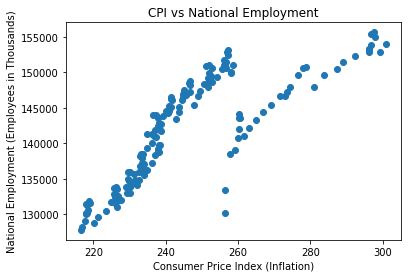

In [14]:
# Plot CPI vs. National Employment 
cpi_value = cpi["value"]
nat_emp_value = nat_employment["value"]
plt.scatter(cpi_value, nat_emp_value)
plt.xlabel("Consumer Price Index (Inflation)")
plt.ylabel("National Employment (Employees in Thousands)")
plt.title("CPI vs National Employment")

#Correlation Coefficient
cc_cpi_emp = round(st.pearsonr(cpi_value, nat_emp_value)[0],2)
print(f"The correlation coefficient between CPI and National Employment is {cc_cpi_emp}.")

#increasing inflation leads to increasing employment 
#plt.savefig("../Graphs/CPI_Employment.png")

The correlation coefficient between CPI and National Employment is 0.82.


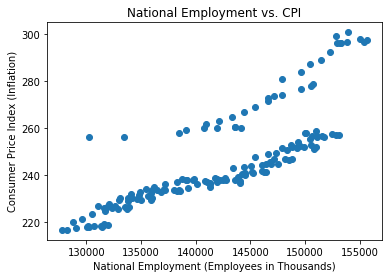

In [15]:
# Plot National Employment vs. CPI
cpi_value = cpi["value"]
nat_emp_value = nat_employment["value"]
plt.scatter(nat_emp_value, cpi_value)
plt.ylabel("Consumer Price Index (Inflation)")
plt.xlabel("National Employment (Employees in Thousands)")
plt.title("National Employment vs. CPI")

#Correlation Coefficient
cc_cpi_emp = round(st.pearsonr(nat_emp_value, cpi_value)[0],2)
print(f"The correlation coefficient between CPI and National Employment is {cc_cpi_emp}.")

#increasing inflation leads to increasing employment 
plt.savefig("../Graphs/CPI_Employment.png")

The correlation coefficient between Interest Rate and Employment is -0.1.


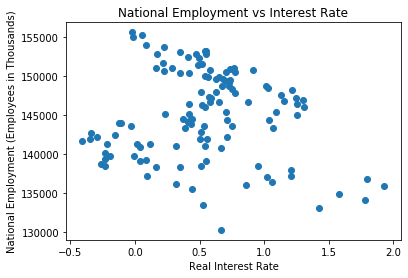

In [32]:
# Plot Employment vs Interest Rate

# drop March 2023 of Interest Rate to make dataset same length
interest_rate_reversed = interest_rate.iloc[::-1]
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Mar-23"].index)

nat_employment_cropped = nat_employment_reversed.drop(nat_employment_reversed[nat_employment_reversed["year"] == 2010].index)
nat_employment_cropped = nat_employment_cropped.drop(nat_employment_cropped[nat_employment_cropped["year"] == 2011].index)
nat_employment_cropped = nat_employment_cropped.drop(nat_employment_cropped[nat_employment_cropped["year"] == 2012].index)

nat_employment_cropped_value = nat_employment_cropped["value"]
interest_rate_reversed_value = interest_rate_reversed["REAINTRATREARAT10Y"]
plt.scatter(interest_rate_reversed_value, nat_employment_cropped_value)
plt.ylabel("National Employment (Employees in Thousands)")
plt.xlabel("Real Interest Rate")
plt.title("National Employment vs Interest Rate")

plt.savefig("../Graphs/Interest_Rate_Employment.png")

#Correlation Coefficient
cc_ir_em = round(st.pearsonr(nat_employment_cropped_value, interest_rate_reversed_value)[0],2)
print(f"The correlation coefficient between Interest Rate and Employment is {cc_ir_em}.")

The correlation coefficient between Interest Rate and Employment is -0.58.


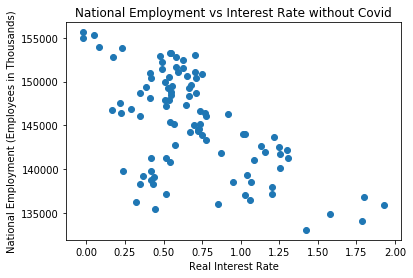

In [31]:
# Plot Employment vs Interest Rate without Covid 

# drop March 2023 of Interest Rate to make dataset same length
interest_rate_reversed = interest_rate.iloc[::-1]
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Mar-23"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jan-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Feb-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Mar-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Apr-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "May-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jun-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jul-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Aug-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Sep-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Oct-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Nov-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Dec-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jan-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Feb-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Mar-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Apr-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "May-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jun-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jul-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Aug-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Sep-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Oct-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Nov-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Dec-21"].index)

nat_employment_cropped = nat_employment_reversed.drop(nat_employment_reversed[nat_employment_reversed["year"] == 2010].index)
nat_employment_cropped = nat_employment_cropped.drop(nat_employment_cropped[nat_employment_cropped["year"] == 2011].index)
nat_employment_cropped = nat_employment_cropped.drop(nat_employment_cropped[nat_employment_cropped["year"] == 2012].index)
nat_employment_cropped_covid = nat_employment_cropped.drop(nat_employment_cropped[nat_employment_cropped["year"] == 2020].index)
nat_employment_cropped_covid = nat_employment_cropped_covid.drop(nat_employment_cropped_covid[nat_employment_cropped_covid["year"] == 2021].index)


nat_employment_covid_value = nat_employment_cropped_covid["value"]
interest_rate_cropped_value = interest_rate_reversed["REAINTRATREARAT10Y"]
plt.scatter(interest_rate_cropped_value, nat_employment_covid_value)
plt.ylabel("National Employment (Employees in Thousands)")
plt.xlabel("Real Interest Rate")
plt.title("National Employment vs Interest Rate without Covid")

plt.savefig("../Graphs/Interest_Rate_Employment_noCovid.png")

#Correlation Coefficient
cc_ir_em_covid = round(st.pearsonr(nat_employment_covid_value, interest_rate_cropped_value)[0],2)
print(f"The correlation coefficient between Interest Rate and Employment is {cc_ir_em_covid}.")

The correlation coefficient between CPI and Interest Rate is 0.21.


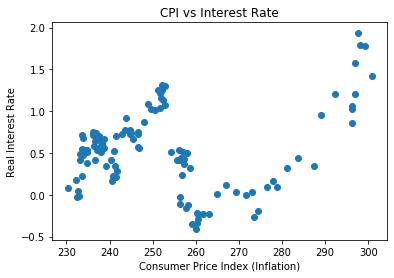

In [18]:
# Plot CPI vs. Interest Rate

# Crop CPI to make dataset same length
cpi_cropped = cpi.drop(cpi[cpi["year"] == 2010].index)
cpi_cropped = cpi_cropped.drop(cpi[cpi["year"] == 2011].index)
cpi_cropped = cpi_cropped.drop(cpi[cpi["year"] == 2012].index)

# drop March 2023 of Interest Rate to make dataset same length
interest_rate_reversed = interest_rate.iloc[::-1]
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Mar-23"].index)

cpi_value = cpi_cropped["value"]
interest_value = interest_rate_reversed["REAINTRATREARAT10Y"]
plt.scatter(cpi_value, interest_value)
plt.xlabel("Consumer Price Index (Inflation)")
plt.ylabel("Real Interest Rate")
plt.title("CPI vs Interest Rate")

plt.savefig("../Graphs/CPI_InterestRate.png")

#Correlation Coefficient
cc_cpi_ir = round(st.pearsonr(cpi_value, interest_value)[0],2)
print(f"The correlation coefficient between CPI and Interest Rate is {cc_cpi_ir}.")

The correlation coefficient between CPI and Interest Rate is 0.6.


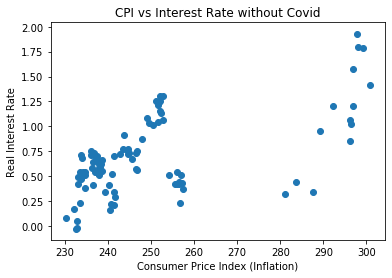

In [19]:
# Plot CPI vs. Interest Rate without 2020 and 2021

# Crop CPI to make dataset same length
cpi_cropped = cpi.drop(cpi[cpi["year"] == 2010].index)
cpi_cropped = cpi_cropped.drop(cpi[cpi["year"] == 2011].index)
cpi_cropped = cpi_cropped.drop(cpi[cpi["year"] == 2012].index)
cpi_cropped = cpi_cropped.drop(cpi[cpi["year"] == 2020].index)
cpi_cropped = cpi_cropped.drop(cpi[cpi["year"] == 2021].index)

# drop March 2023 of Interest Rate to make dataset same length
interest_rate_reversed = interest_rate.iloc[::-1]
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Mar-23"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jan-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Feb-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Mar-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Apr-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "May-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jun-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jul-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Aug-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Sep-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Oct-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Nov-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Dec-20"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jan-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Feb-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Mar-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Apr-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "May-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jun-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Jul-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Aug-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Sep-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Oct-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Nov-21"].index)
interest_rate_reversed = interest_rate_reversed.drop(interest_rate_reversed[interest_rate_reversed["observation_date"] == "Dec-21"].index)

cpi_value = cpi_cropped["value"]
interest_value = interest_rate_reversed["REAINTRATREARAT10Y"]
plt.scatter(cpi_value, interest_value)
plt.xlabel("Consumer Price Index (Inflation)")
plt.ylabel("Real Interest Rate")
plt.title("CPI vs Interest Rate without Covid")

plt.savefig("../Graphs/CPI_InterestRate_noCovid.png")

#Correlation Coefficient
cc_cpi_ir = round(st.pearsonr(cpi_value, interest_value)[0],2)
print(f"The correlation coefficient between CPI and Interest Rate is {cc_cpi_ir}.")